<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#" data-toc-modified-id="-1"><span class="toc-item-num">1&nbsp;&nbsp;</span></a></span></li></ul></div>

In [16]:
import keras,os
from keras.models import Sequential, Model   # M
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.layers import Dropout  #
from keras.preprocessing.image import ImageDataGenerator

from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.optimizers import Adam, RMSprop

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
import os

In [18]:
trdata = ImageDataGenerator(rescale=1./255,
                           rotation_range=20, 
                            zoom_range=0.15,
                            width_shift_range=0.2, 
                            height_shift_range=0.2, 
                            shear_range=0.15,
                            horizontal_flip=True, 
                            fill_mode="nearest")
#                             rotation_range=40,
#                            width_shift_range=0.2,
#                            height_shift_range=0.2,
#                            shear_range=0.2,
#                            zoom_range=0.2,
#                            horizontal_flip=True, 
                            
traindata = trdata.flow_from_directory(directory="D:/kvasir-dataset-v2/train_data",target_size=(224,224))

Found 6400 images belonging to 8 classes.


In [19]:
tsdata = ImageDataGenerator(rescale = 1./255)
testdata = trdata.flow_from_directory(directory="D:/kvasir-dataset-v2/test_data",target_size=(224,224))

Found 1600 images belonging to 8 classes.


In [20]:
from keras.applications import VGG16
VGG = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
VGG.trainable = False

In [21]:
VGG.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [22]:
def print_layer_trainable(model):
    for layer in model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

In [23]:
print_layer_trainable(VGG)

False:	input_2
True:	block1_conv1
True:	block1_conv2
True:	block1_pool
True:	block2_conv1
True:	block2_conv2
True:	block2_pool
True:	block3_conv1
True:	block3_conv2
True:	block3_conv3
True:	block3_pool
True:	block4_conv1
True:	block4_conv2
True:	block4_conv3
True:	block4_pool
True:	block5_conv1
True:	block5_conv2
True:	block5_conv3
True:	block5_pool


In [24]:
model = keras.Sequential([
    VGG,
    keras.layers.Flatten(),
    #keras.layers.Dropout(0.5),
    #keras.layers.Dense(units=1024,activation="relu"),
    #keras.layers.Dropout(0.5),
    #keras.layers.Dense(units=1024,activation="relu"),
    keras.layers.Dense(units=8,activation="softmax")
])
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 200712    
Total params: 14,915,400
Trainable params: 200,712
Non-trainable params: 14,714,688
_________________________________________________________________


In [26]:
for layer in model.layers[:1]:
    layer.trainable = False

In [27]:
model.layers[-1].trainable

True

In [28]:
print_layer_trainable(model)

False:	vgg16
True:	flatten_2
True:	dense_2


In [29]:
hist = model.fit(x=traindata,
                        epochs=15,
                        steps_per_epoch=200,
                        #class_weight=class_weight,
                        validation_data=testdata,
                        validation_steps=60)

Epoch 1/15
200/200 [==============================] - 280s 1s/step - loss: 1.3665 - accuracy: 0.5102 - val_loss: 1.2070 - val_accuracy: 0.6229
Epoch 2/15
200/200 [==============================] - 211s 1s/step - loss: 0.9313 - accuracy: 0.6762 - val_loss: 0.8806 - val_accuracy: 0.6839
Epoch 3/15
200/200 [==============================] - 472s 2s/step - loss: 0.7873 - accuracy: 0.7158 - val_loss: 0.7032 - val_accuracy: 0.6927
Epoch 4/15
200/200 [==============================] - 308s 2s/step - loss: 0.7223 - accuracy: 0.7358 - val_loss: 0.5916 - val_accuracy: 0.7021
Epoch 5/15
200/200 [==============================] - 224s 1s/step - loss: 0.6714 - accuracy: 0.7538 - val_loss: 0.8000 - val_accuracy: 0.7193
Epoch 6/15
200/200 [==============================] - 221s 1s/step - loss: 0.6432 - accuracy: 0.7661 - val_loss: 0.7660 - val_accuracy: 0.7307
Epoch 7/15
200/200 [==============================] - 221s 1s/step - loss: 0.6161 - accuracy: 0.7698 - val_loss: 0.8111 - val_accuracy: 0.7359

In [30]:
model_file= 'vggclf3.h5'
model.save(model_file)

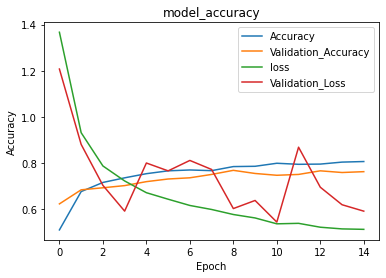

In [31]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("model_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation_Accuracy","loss","Validation_Loss"])
#plt.axis([0,5,0,3])
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_test,  # True class for test-set.
                          y_pred=cls_pred)  # Predicted class.

    print("Confusion matrix:")
    
    # Print the confusion matrix as text.
    print(cm)
    
    # Print the class-names for easy reference.
    for i, class_name in enumerate(class_names):
        print("({0}) {1}".format(i, class_name))

In [33]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true)

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    for i, ax in enumerate(axes.flat):
        # There may be less than 9 images, ensure it doesn't crash.
        if i < len(images):
            # Plot image.
            ax.imshow(images[i],
                      interpolation=interpolation)

            # Name of the true class.
            cls_true_name = class_names[cls_true[i]]

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true_name)
            else:
                # Name of the predicted class.
                cls_pred_name = class_names[cls_pred[i]]

                xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [34]:
def plot_example_errors(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Boolean array whether the predicted class is incorrect.
    incorrect = (cls_pred != cls_test)

    # Get the file-paths for images that were incorrectly classified.
    image_paths = np.array(image_paths_test)[incorrect]

    # Load the first 9 images.
    images = load_images(image_paths=image_paths[0:9])
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = cls_test[incorrect]
    
    # Plot the 9 images we have loaded and their corresponding classes.
    # We have only loaded 9 images so there is no need to slice those again.
    plot_images(images=images,
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [35]:
def example_errors():
    # The Keras data-generator for the test-set must be reset
    # before processing. This is because the generator will loop
    # infinitely and keep an internal index into the dataset.
    # So it might start in the middle of the test-set if we do
    # not reset it first. This makes it impossible to match the
    # predicted classes with the input images.
    # If we reset the generator, then it always starts at the
    # beginning so we know exactly which input-images were used.
    testdata.reset()
    
    # Predict the classes for all images in the test-set.
    y_pred = model.predict(testdata, steps=testdata.n / 32)

    # Convert the predicted classes from arrays to integers.
    cls_pred = np.argmax(y_pred,axis=1)

    # Plot examples of mis-classified images.
    plot_example_errors(cls_pred)
    
    # Print the confusion matrix.
    print_confusion_matrix(cls_pred)

In [36]:
def path_join(dirname, filenames):
    return [os.path.join(dirname, filename) for filename in filenames]

In [37]:
def load_images(image_paths):
    # Load the images from disk.
    images = [plt.imread(path) for path in image_paths]

    # Convert to a numpy array and return it.
    return np.asarray(images)

In [38]:
train_dir = "D:/kvasir-dataset-v2/train_data"
test_dir = "D:/kvasir-dataset-v2/test_data"

In [39]:
image_paths_train = path_join(train_dir, traindata.filenames)
image_paths_test = path_join(test_dir, testdata.filenames)

In [40]:
cls_test = testdata.classes
cls_train = traindata.classes

In [41]:
class_names = list(traindata.class_indices.keys())
class_names

['dyed-lifted-polyps',
 'dyed-resection-margins',
 'esophagitis',
 'normal-cecum',
 'normal-pylorus',
 'normal-z-line',
 'polyps',
 'ulcerative-colitis']

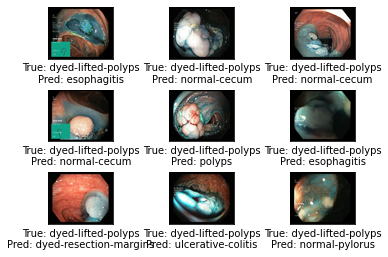

Confusion matrix:
[[20 33 15 33 24 27 21 27]
 [18 30 22 32 29 18 29 22]
 [19 27 22 34 29 33 16 20]
 [25 26 31 29 26 21 19 23]
 [18 29 28 30 28 23 20 24]
 [25 30 18 25 27 30 26 19]
 [21 19 21 29 27 31 24 28]
 [24 24 20 34 22 33 19 24]]
(0) dyed-lifted-polyps
(1) dyed-resection-margins
(2) esophagitis
(3) normal-cecum
(4) normal-pylorus
(5) normal-z-line
(6) polyps
(7) ulcerative-colitis


In [42]:
example_errors()

In [43]:
# from keras.preprocessing import image
# img = image.load_img("D:/00fb1871-41c0-4619-be56-29690d145b1d.jpg" ,target_size=(224,224))
# img = np.asarray(img)
# plt.imshow(img)
# img = np.expand_dims(img, axis=0)
# ## img = keras.applications.vgg16.preprocess_input(x)

In [44]:
# from keras.models import load_model
# saved_model = load_model(model_file)
# output = saved_model.predict(img)

In [45]:
# label = ["1-dyed-lifted-polyps","2-dyed-resection-margins","3-esophagitis","4-normal-cecum","5-normal-pylorus","6-normal-z-line","7-polyps","8-ulcerative-colitis"]
# print(output)

In [47]:
# print(label[output[0].argmax()])

<font size="6">Fine-Tuning</font>

In [48]:
print_layer_trainable(VGG)

False:	input_2
True:	block1_conv1
True:	block1_conv2
True:	block1_pool
True:	block2_conv1
True:	block2_conv2
True:	block2_pool
True:	block3_conv1
True:	block3_conv2
True:	block3_conv3
True:	block3_pool
True:	block4_conv1
True:	block4_conv2
True:	block4_conv3
True:	block4_pool
True:	block5_conv1
True:	block5_conv2
True:	block5_conv3
True:	block5_pool


In [49]:
VGG.trainable = True

In [50]:
print_layer_trainable(VGG)

False:	input_2
True:	block1_conv1
True:	block1_conv2
True:	block1_pool
True:	block2_conv1
True:	block2_conv2
True:	block2_pool
True:	block3_conv1
True:	block3_conv2
True:	block3_conv3
True:	block3_pool
True:	block4_conv1
True:	block4_conv2
True:	block4_conv3
True:	block4_pool
True:	block5_conv1
True:	block5_conv2
True:	block5_conv3
True:	block5_pool


In [51]:
for layer in VGG.layers:
    trainable = ('block5' in layer.name or 'block4' in layer.name)
    
    layer.trainable = trainable

In [52]:
print_layer_trainable(VGG)

False:	input_2
False:	block1_conv1
False:	block1_conv2
False:	block1_pool
False:	block2_conv1
False:	block2_conv2
False:	block2_pool
False:	block3_conv1
False:	block3_conv2
False:	block3_conv3
False:	block3_pool
True:	block4_conv1
True:	block4_conv2
True:	block4_conv3
True:	block4_pool
True:	block5_conv1
True:	block5_conv2
True:	block5_conv3
True:	block5_pool


In [53]:
optimizer_fine = Adam(lr=1e-7)

In [54]:
loss = 'categorical_crossentropy'
metrics = ['accuracy']

In [55]:
print_layer_trainable(model)

True:	vgg16
True:	flatten_2
True:	dense_2


In [56]:
print_layer_trainable(model.layers[0])

False:	input_2
False:	block1_conv1
False:	block1_conv2
False:	block1_pool
False:	block2_conv1
False:	block2_conv2
False:	block2_pool
False:	block3_conv1
False:	block3_conv2
False:	block3_conv3
False:	block3_pool
True:	block4_conv1
True:	block4_conv2
True:	block4_conv3
True:	block4_pool
True:	block5_conv1
True:	block5_conv2
True:	block5_conv3
True:	block5_pool


In [57]:
model.compile(optimizer=optimizer_fine, loss=loss, metrics=metrics)

##### 

In [58]:
#hist1 = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data=testdata, validation_steps=10, epochs=5)

hist1 = model.fit(x=traindata,
                        epochs=10,
                        steps_per_epoch=200,
                        #class_weight=class_weight,
                        validation_data=testdata,
                        validation_steps=60)

Epoch 1/10
200/200 [==============================] - 233s 1s/step - loss: 0.4808 - accuracy: 0.8197 - val_loss: 0.4993 - val_accuracy: 0.7771
Epoch 2/10
200/200 [==============================] - 222s 1s/step - loss: 0.4660 - accuracy: 0.8228 - val_loss: 0.4645 - val_accuracy: 0.7734
Epoch 3/10
200/200 [==============================] - 219s 1s/step - loss: 0.4632 - accuracy: 0.8244 - val_loss: 0.6055 - val_accuracy: 0.7688
Epoch 4/10
200/200 [==============================] - 222s 1s/step - loss: 0.4550 - accuracy: 0.8263 - val_loss: 0.5356 - val_accuracy: 0.7922
Epoch 5/10
200/200 [==============================] - 226s 1s/step - loss: 0.4580 - accuracy: 0.8225 - val_loss: 0.4832 - val_accuracy: 0.7911
Epoch 6/10
200/200 [==============================] - 221s 1s/step - loss: 0.4470 - accuracy: 0.8311 - val_loss: 0.5053 - val_accuracy: 0.7823
Epoch 7/10
200/200 [==============================] - 222s 1s/step - loss: 0.4367 - accuracy: 0.8280 - val_loss: 0.6736 - val_accuracy: 0.7839

In [59]:
def plot_training_history(history):
    # Get the classification accuracy and loss-value
    # for the training-set.
    acc = history.history['accuracy']
    loss = history.history['loss']

    # Get it for the validation-set (we only use the test-set).
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    # Plot the accuracy and loss-values for the training-set.
    plt.plot(acc, linestyle='-', color='b', label='Training Acc.')
    plt.plot(loss, 'o', color='b', label='Training Loss')
    
    # Plot it for the test-set.
    plt.plot(val_acc, linestyle='--', color='r', label='Test Acc.')
    plt.plot(val_loss, 'o', color='r', label='Test Loss')

    # Plot title and legend.
    plt.title('Training and Test Accuracy')
    plt.legend()

    # Ensure the plot shows correctly.
    plt.show()



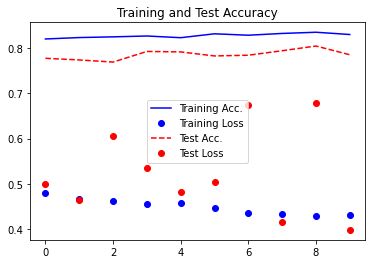

In [60]:
plot_training_history(hist1)

In [61]:
model.save('vggclf4.h5')

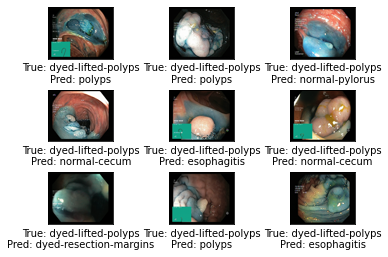

Confusion matrix:
[[27 26 26 23 27 25 23 23]
 [27 24 23 22 22 34 23 25]
 [25 22 23 29 27 27 28 19]
 [19 22 22 31 32 31 18 25]
 [30 22 26 27 30 24 20 21]
 [27 29 23 24 22 31 22 22]
 [26 23 26 31 24 25 21 24]
 [33 27 20 32 19 15 24 30]]
(0) dyed-lifted-polyps
(1) dyed-resection-margins
(2) esophagitis
(3) normal-cecum
(4) normal-pylorus
(5) normal-z-line
(6) polyps
(7) ulcerative-colitis


In [62]:
example_errors()

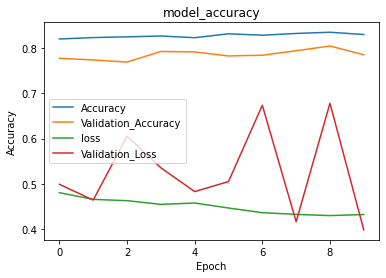

In [63]:
plt.plot(hist1.history["accuracy"])
plt.plot(hist1.history["val_accuracy"])
plt.plot(hist1.history["loss"])
plt.plot(hist1.history["val_loss"])
plt.title("model_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation_Accuracy","loss","Validation_Loss"])
plt.show()